In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from extract_center import CenterExtracter
import pandas as pd
import random

In [2]:
plt.rcdefaults()

In [3]:
image_path = "../data/images1"
c = CenterExtracter()

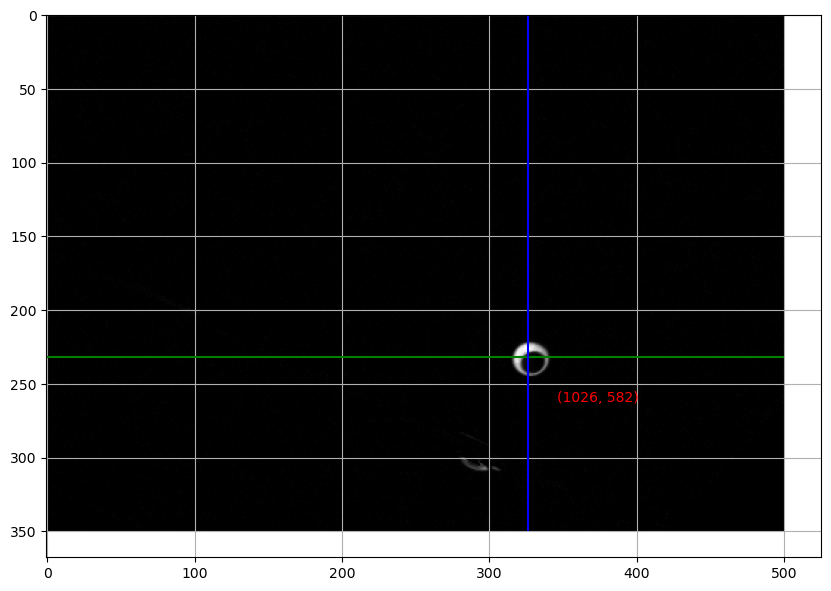

((9, 9), (1026, 582))

In [4]:
image = plt.imread(image_path+"/120.jpg")
c.get_center(image_path+"/120.jpg", h=500, w=500, subtract=True, strict=False)

In [5]:
images = os.listdir(image_path)
len(images)

171

In [6]:
sorted_images = sorted(images, key=lambda x: int(x.split(".")[0]))

In [7]:
xs = []
ys = []
r1s = []
r2s = []
for img in sorted_images:
    if img.endswith(".jpg"):
        try:
            (r1, r2), (x, y) = c.get_center(image_path+"/"+img, h=500, w=500, subtract=True, strict=False,
            plot=False)
            xs.append(x)
            ys.append(y)
            r1s.append(r1)
            r2s.append(r2)
        except:
            # clear_output(wait=True)
            print("Error on: ", img)
            xs.append(None)
            ys.append(None)
            r1s.append(None)
            r2s.append(None)

Error on:  71.jpg
Error on:  102.jpg
Error on:  160.jpg
Error on:  161.jpg
Error on:  162.jpg
Error on:  163.jpg
Error on:  164.jpg
Error on:  165.jpg
Error on:  166.jpg
Error on:  167.jpg
Error on:  168.jpg
Error on:  169.jpg
Error on:  170.jpg


In [8]:
df = pd.DataFrame({"image": sorted_images, "x": xs, "y": ys, "r1": r1s, "r2": r2s})
df.head()

image      x      y    r1    r2
0  0.jpg  871.0  401.0  10.0  13.0
1  1.jpg  871.0  401.0  10.0  13.0
2  2.jpg  871.0  401.0  10.0  13.0
3  3.jpg  871.0  401.0  10.0  13.0
4  4.jpg  871.0  401.0  10.0  13.0

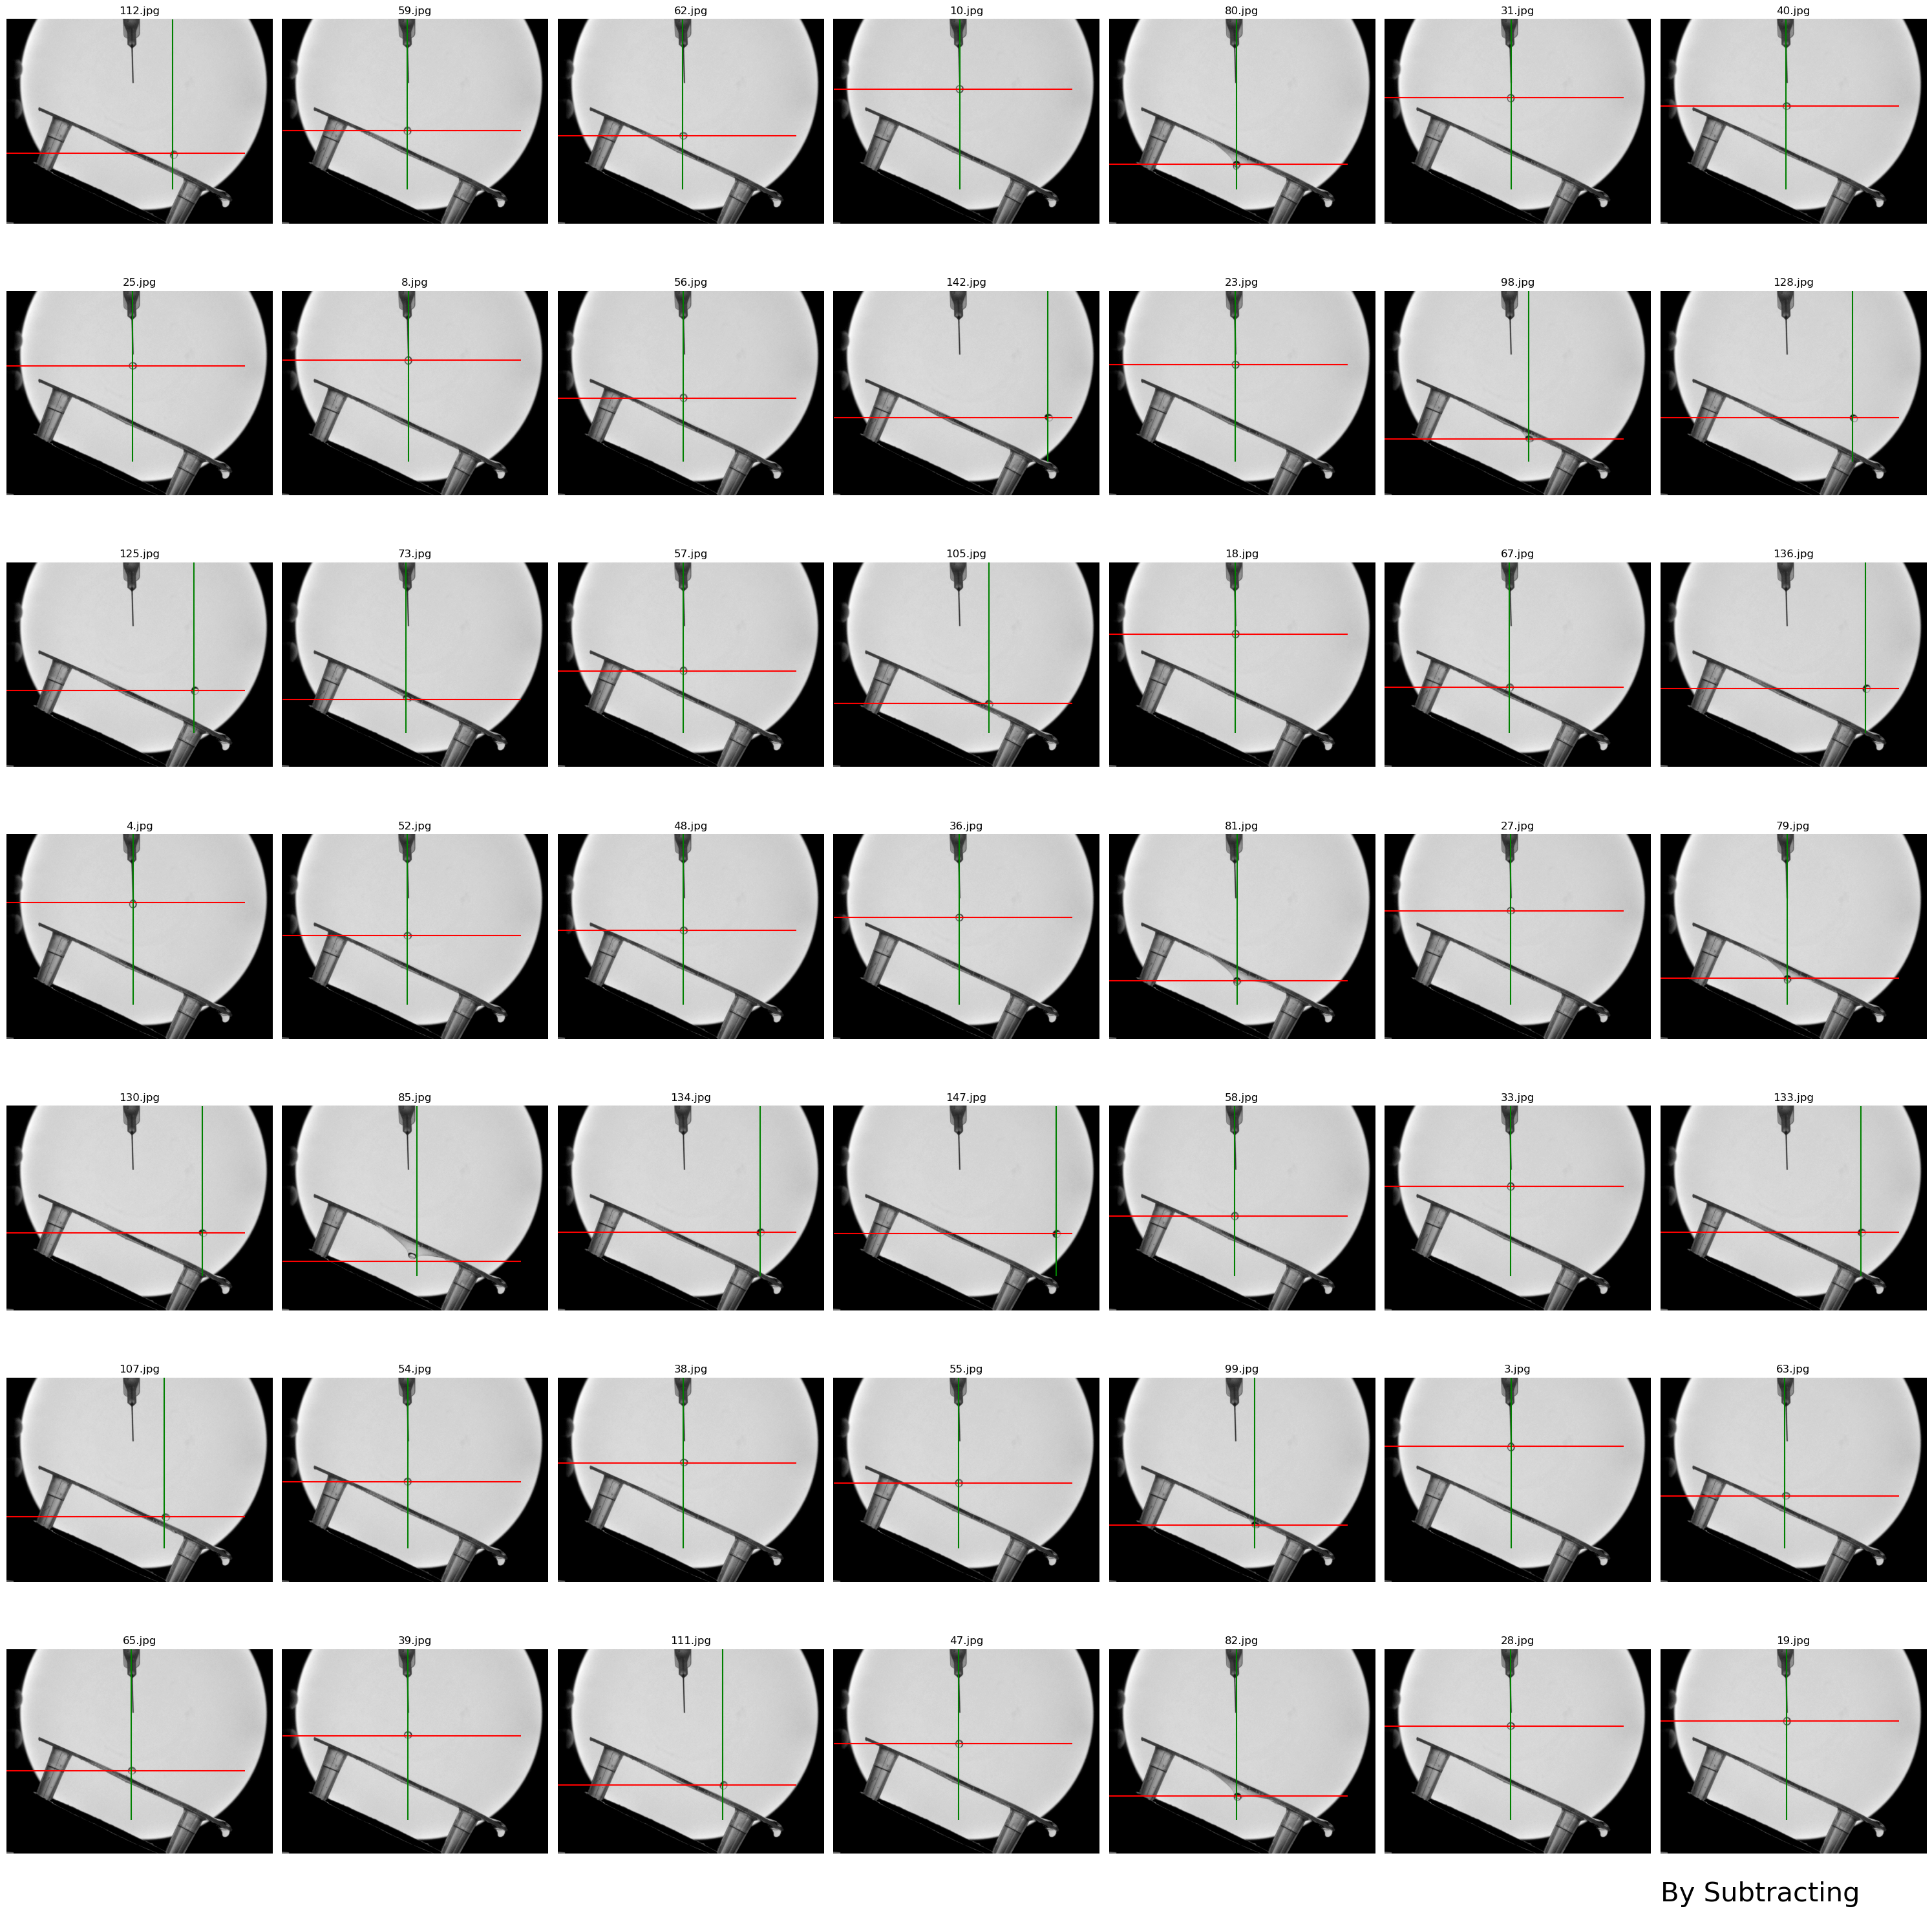

In [10]:
len_samples = 49
plt.figure(figsize=(30, 30))
df = df[df["x"].notna()]
samples = random.sample(list(df["image"][:-10]), len_samples)
for img in samples:
    plt.subplot(7, 7, samples.index(img)+1)
    x, y =  df[df["image"] == img]["x"].values[0], df[df["image"] == img]["y"].values[0]
    plt.imshow(plt.imread(image_path+"/"+img)[200:, 500:], cmap="gray")
    plt.hlines(y-200, 0, 1300-600, color="r")
    plt.vlines(x-500, 0, 800-300, color="g")
    plt.title(img)
    plt.axis("off")
plt.tight_layout()
plt.annotate("With Subtracting", (0, 0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=30)
plt.savefig("samples_with_subtracting.jpg")

In [11]:
df.to_csv("../data/results/with_subtraction.csv", index=False)

## A Preliminary Analysis of the Coordinates

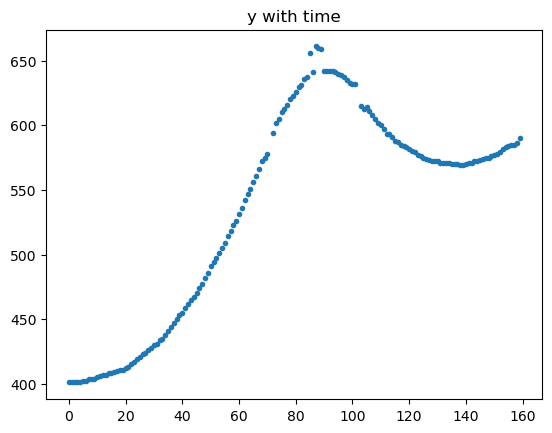

In [13]:
plt.plot(df["y"], ".")
plt.title("y with time");

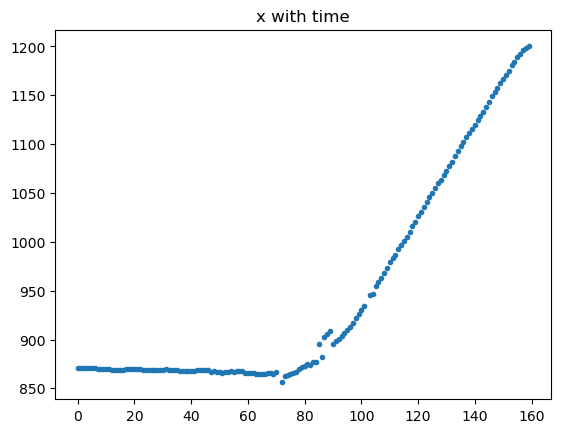

In [14]:
plt.plot(df["x"], ".")
plt.title("x with time");

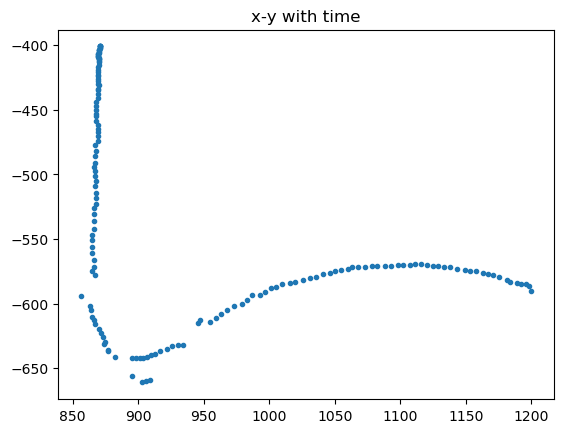

In [15]:
plt.plot(df["x"], -df["y"], ".")
plt.title("x-y with time");

In [16]:
df["vy"] = df["y"].diff()
df["vx"] = df["x"].diff()
df["v"] = np.sqrt(df["vy"]**2 + df["vx"]**2)

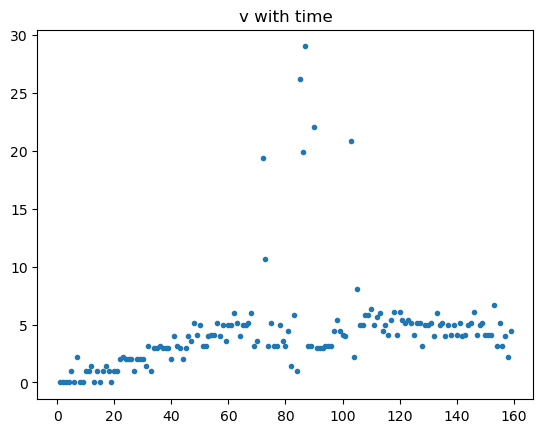

In [17]:
plt.plot(df["v"], ".")
plt.title("v with time");

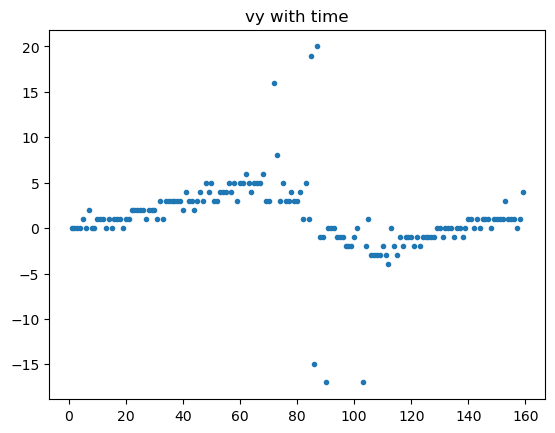

In [18]:
plt.plot(df["vy"], ".")
plt.title("vy with time");

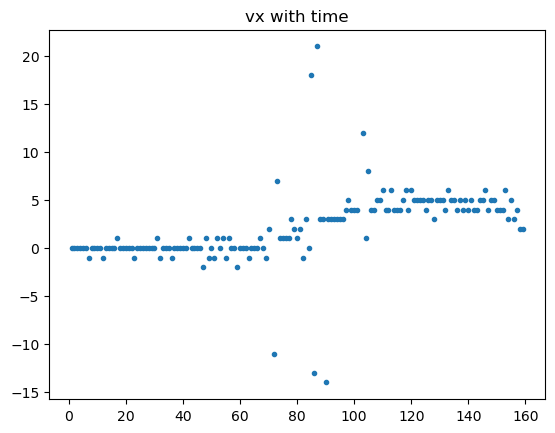

In [19]:
plt.plot(df["vx"], ".")
plt.title("vx with time");

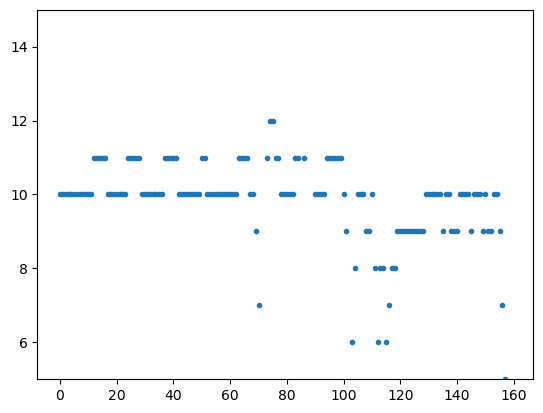

In [26]:
plt.plot(df['r1'], ".")
plt.ylim([5,15]);

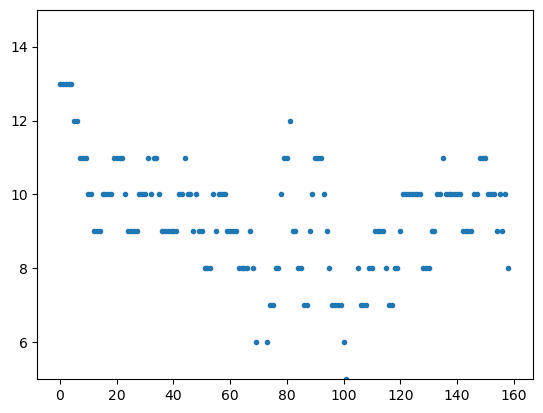

In [27]:
plt.plot(df['r2'], ".")
plt.ylim([5,15]);

In [20]:
df.describe()

x           y          r1          r2          vy  \
count   158.000000  158.000000  158.000000  158.000000  157.000000   
mean    948.101266  536.468354   10.575949    9.132911    1.203822   
std     108.452413   81.800259    5.894286    1.885596    4.083643   
min     856.000000  401.000000    0.000000    1.000000  -17.000000   
25%     869.000000  453.500000   10.000000    8.000000    0.000000   
50%     872.500000  571.000000   10.000000    9.000000    1.000000   
75%    1024.500000  593.000000   10.000000   10.000000    3.000000   
max    1200.000000  661.000000   49.000000   13.000000   20.000000   

               vx           v  
count  157.000000  157.000000  
mean     2.095541    4.378646  
std      3.754968    4.166342  
min    -14.000000    0.000000  
25%      0.000000    3.000000  
50%      1.000000    4.000000  
75%      4.000000    5.099020  
max     21.000000   29.000000

In [1]:
from run import Run

In [2]:
r = Run("../data/images1")

In [3]:
r.subtracting_images(subtract=True, strict=False,
            plot=False)

Getting list of images...
Extracting data from images...
Error on:  ../data/images1/71.jpg


IndexError: index 0 is out of bounds for axis 0 with size 0

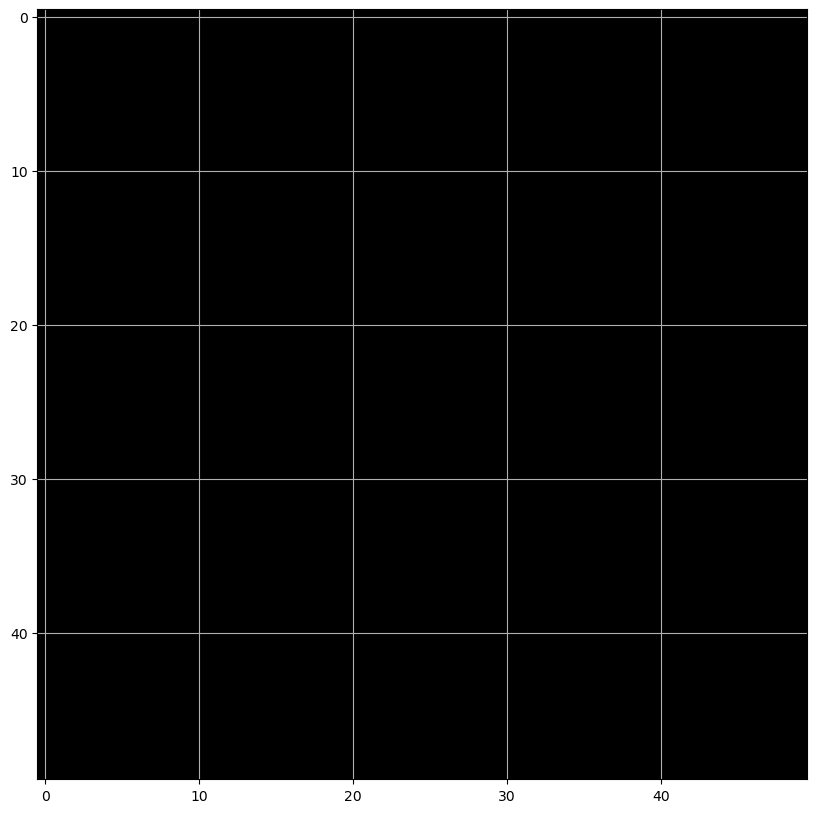

In [5]:
r.c._show_image_(r.c.image_final)